In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import requests

train_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv'

def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status() 
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

download_file(train_data_url, 'module3_exercise_train.csv')
download_file(test_data_url, 'module3_exercise_test.csv')

Downloaded module3_exercise_train.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv
Downloaded module3_exercise_test.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv


In [3]:
df =  pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')

In [4]:
df

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
254,2,1,4.0,1,1977.0,two,440,0,55,0,0,165,0,0,7,2010.0,127500
1066,1,1,5.0,1,1983.0,two,612,349,40,0,0,0,0,0,9,2009.0,316600
638,4,1,10.0,1,1998.0,two,420,144,123,0,0,0,0,0,7,2006.0,258000
799,3,1,8.0,0,1916.0,one,180,0,0,0,140,0,0,0,8,2009.0,135000
380,2,1,5.0,0,2005.0,two,438,108,0,0,0,0,0,0,3,2006.0,167240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,4,1,7.0,0,-1.0,zero,0,0,192,0,0,0,0,0,11,2008.0,130000
1130,3,1,6.0,0,1964.0,two,504,0,0,0,0,0,0,0,7,2008.0,145000
1294,3,1,7.0,1,1996.0,three,889,220,0,0,0,0,0,0,7,2009.0,265000


In [5]:
df.shape

(1168, 17)

**Insight:**
- The dataset contains 1168 rows and 17 columns.

In [7]:
print("Sample of the dataset:")
df.sample(10)

Sample of the dataset:


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1118,4,1,8.0,2,1966.0,two,487,105,66,0,0,0,0,0,5,2006.0,226000
140,3,1,6.0,1,1939.0,one,312,0,0,0,0,0,0,0,10,2006.0,140200
224,3,1,6.0,0,2000.0,two,539,120,55,0,0,0,0,0,12,2007.0,179000
1171,3,1,7.0,1,1970.0,two,576,301,0,0,0,0,0,0,7,2010.0,180000
440,2,1,4.0,0,-1.0,zero,0,0,0,0,0,0,0,0,8,2006.0,85500
12,2,1,5.0,1,2008.0,two,482,162,53,0,153,0,0,0,11,2008.0,392500
821,2,1,4.0,0,2004.0,two,480,0,172,0,0,0,0,0,6,2010.0,151000
617,3,1,6.0,1,1972.0,two,495,0,0,216,0,126,0,0,5,2007.0,144000
204,4,1,8.0,1,2003.0,two,434,100,48,0,0,0,0,0,7,2007.0,219500


**Insight:**
- Missing or Erroneous Data: The GarageYrBlt column has a value of -1.0, which suggests missing or erroneous data that needs to be addressed.
- Categorical Variables: Columns like BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars and MoSold are categorical and will need to be analyzed accordingly.

In [9]:
print("\nSummary info:")
df.info()


Summary info:
<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memo

**Insight:**
- The data types are predominantly integer (int64) with 3 columns being a float (float64) and one column object.

In [11]:
df[df.isnull().any(axis=1)]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1189,3,1,6.0,0,1966.0,NaN,408,0,0,0,0,0,0,0,12,2008.0,109900
135,2,1,6.0,0,1981.0,one,308,0,176,0,0,0,0,0,6,NaN,120000
321,2,1,NaN,1,1948.0,one,240,0,130,0,0,0,0,0,11,2007.0,119200


**Insight:** 
- The dataset contains three missing values.

In [13]:
print("\nSummary Statistics:")
print(f"Number different values per column\n{df.nunique()}")
df.describe()


Summary Statistics:
Number different values per column
BedroomAbvGr       8
KitchenAbvGr       3
TotRmsAbvGrd      12
Fireplaces         4
GarageYrBlt       98
GarageCars         5
GarageArea       387
WoodDeckSF       242
OpenPorchSF      184
EnclosedPorch    105
3SsnPorch         15
ScreenPorch       66
PoolArea           6
MiscVal           19
MoSold            12
YrSold             5
SalePrice        571
dtype: int64


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1167.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1167.000000,1168.000000
mean,2.872432,1.043664,6.497858,0.607877,1867.833904,469.120719,91.976027,46.300514,23.607021,2.782534,15.701199,2.378425,39.720890,6.336473,2007.802057,179163.845890
std,0.805929,0.212653,1.618330,0.630833,454.504382,210.626791,123.448275,67.180017,62.307174,23.908902,57.516696,36.477960,489.113625,2.692267,1.327656,76848.682649
min,0.000000,1.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,2.000000,1.000000,5.000000,0.000000,1957.000000,324.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,3.000000,1.000000,6.000000,1.000000,1977.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161625.000000
75%,3.000000,1.000000,7.000000,1.000000,2000.000000,576.000000,168.000000,66.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212250.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,736.000000,547.000000,386.000000,320.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


In [14]:
print("\nDuplicate rows:")
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())


Duplicate rows:


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1057,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000
1389,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000


**Insight:**
- The dataset contains 2 duplicate rows out of 1168, which is approximately 0.17% of the dataset.


Histograms of numerical features:


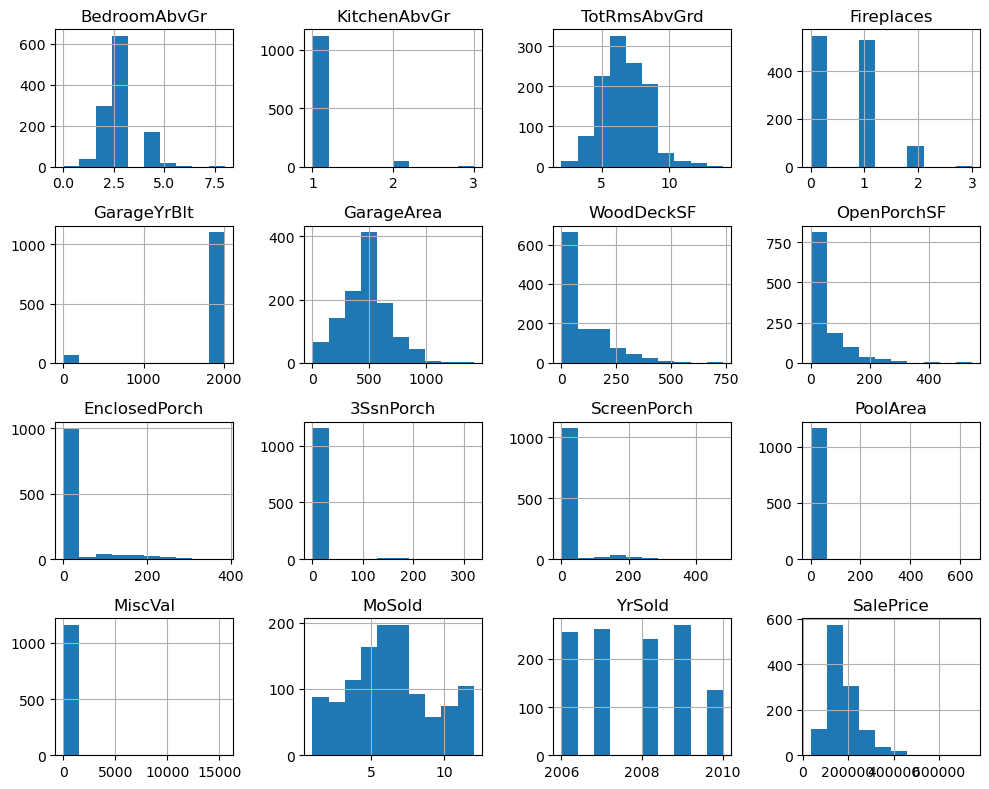

In [16]:
print("\nHistograms of numerical features:")
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

**Insight:**
- Majority of property have 3 bedrooms above grade, followed by 2 bedrooms. There is in most cases one kitchen and no pool, porch or fireplaces.
- This distribution indicates a larger representation of mid-class property.


Box plots to check for outliers:


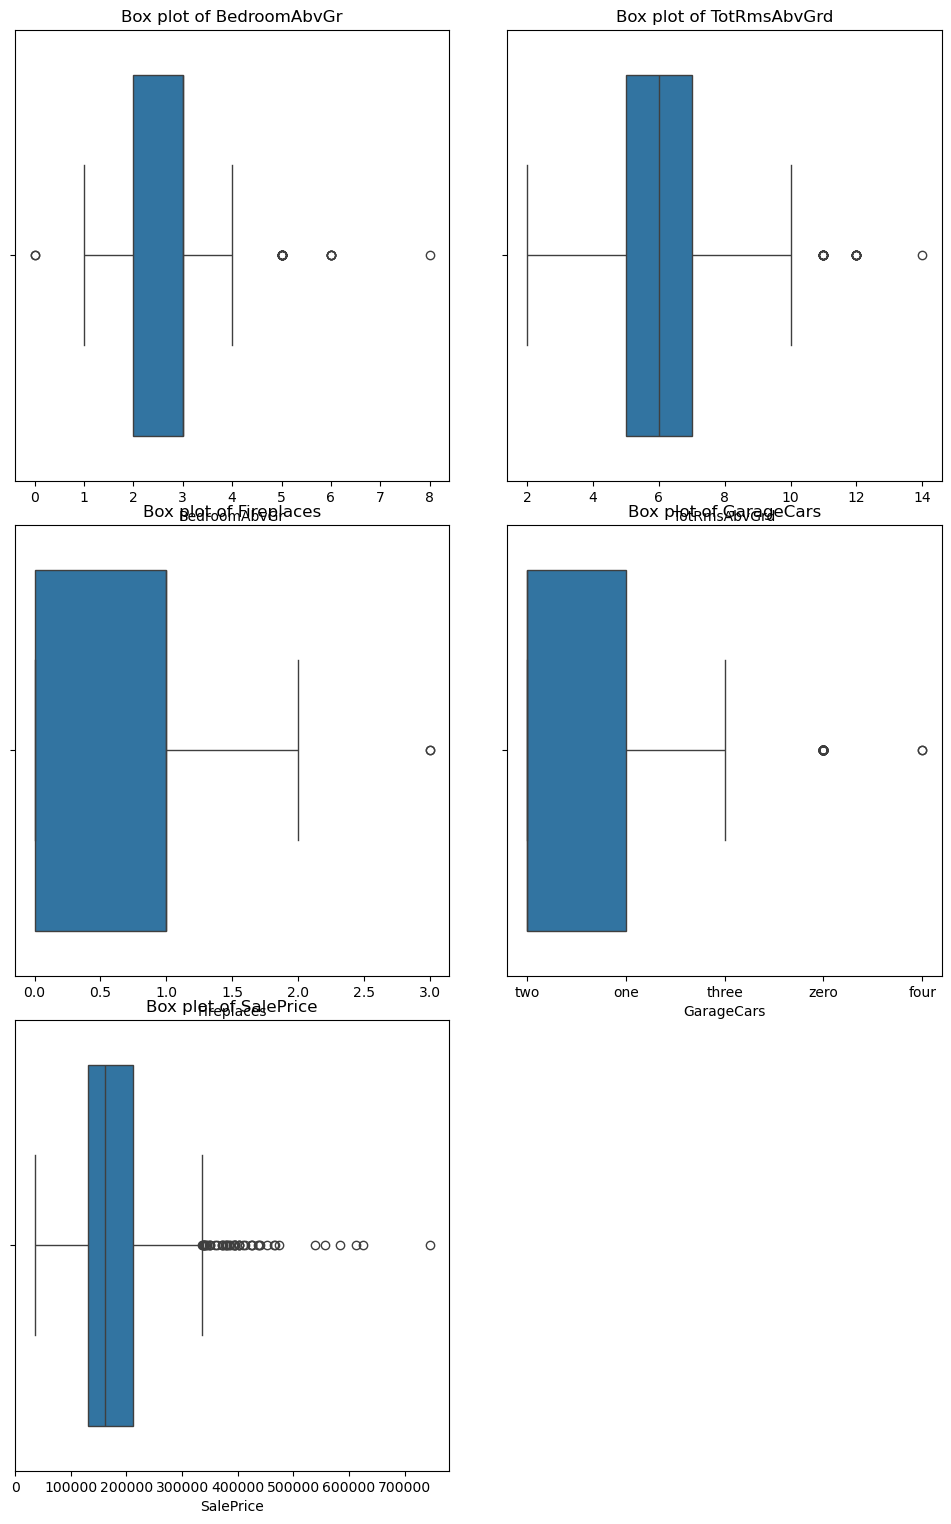

In [18]:
# Box plots for numerical variables to check outliers
print("\nBox plots to check for outliers:")
numeric_cols = ["BedroomAbvGr", "TotRmsAbvGrd", "Fireplaces", 
                "GarageCars", "SalePrice"]

# Set up the plot grid
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, n_rows*5))
fig.tight_layout()

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_pos = i % n_cols
    sns.boxplot(x=df[col], ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'Box plot of {col}')

# Remove empty subplots if the number of columns is odd
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()

**Insights:**
- BedroomAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars: Those distributions show some outliers.
- SalePrice: This distribution is not clear due to the "uniform" data. 

In [20]:
df.drop("GarageCars", axis=1, inplace=True)


Correlation matrix:


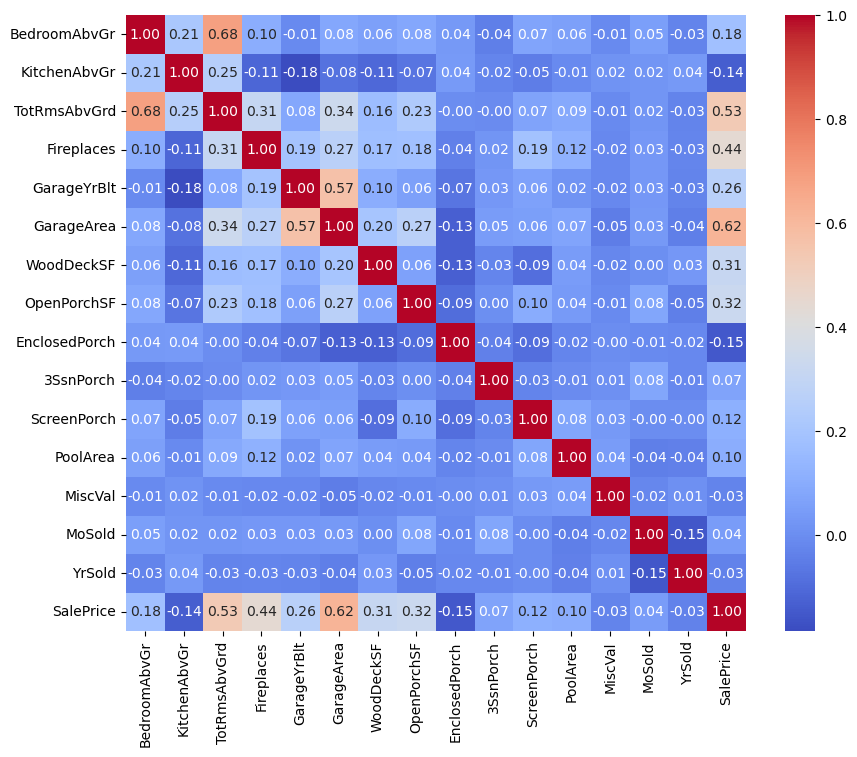

In [21]:
print("\nCorrelation matrix:")
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


Important correlations with 'SalePrice':


Text(0.5, 1.0, 'Top Negative Correlations')

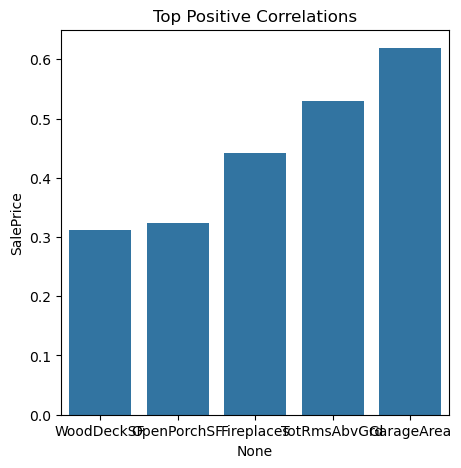

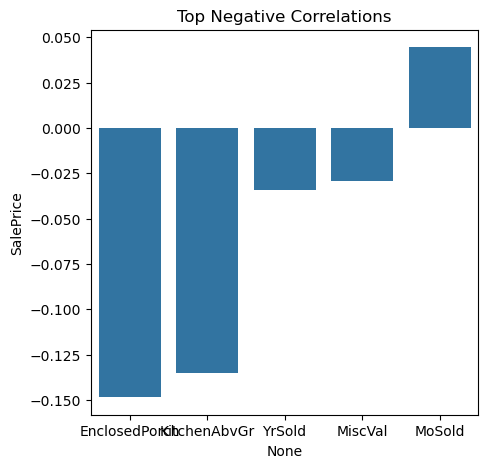

In [53]:
print("\nImportant correlations with 'SalePrice':")
corrs = df.corr().sort_values(by=['SalePrice'])['SalePrice'].iloc[:-1]
corrs_max = corrs[-5:]
corrs_min = corrs[:5]
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_max.index, y = corrs_max)
plt.title("Top Positive Correlations")
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_min.index, y = corrs_min)
plt.title("Top Negative Correlations")

**Insight:**
- GarageArea, TotRmsAbvGrd and Fireplaces have an important positive correlation with the SalePrice.
- EnclosedPorch and KitchenAbvGr have a moderate negative correlation with the SalePrice. 

In [24]:
X_test =  pd.read_csv("module3_exercise_test.csv", sep=",", index_col='id')

In [25]:
X_test.drop("GarageCars", axis=1, inplace=True)

In [26]:
X_test.shape

(292, 15)

In [27]:
X_test.isnull().sum()

BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       1
GarageYrBlt      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    1
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

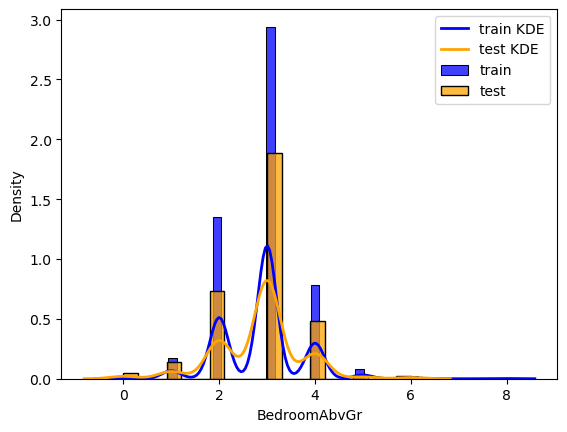

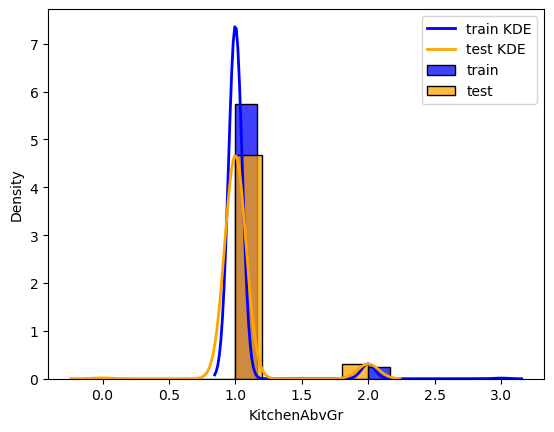

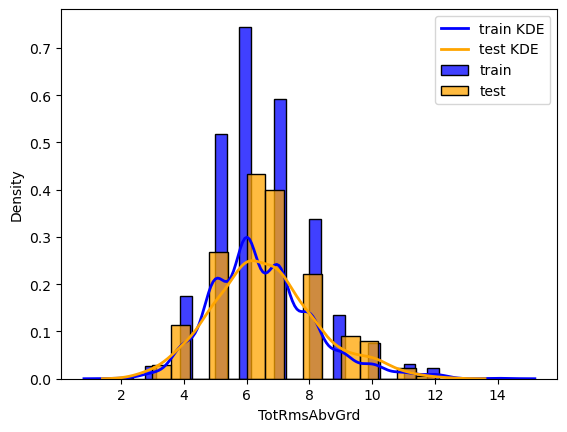

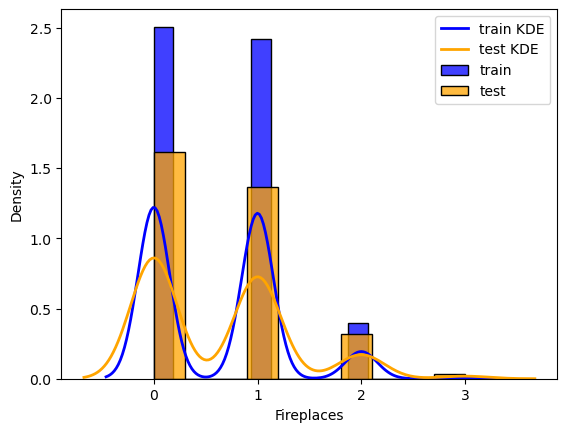

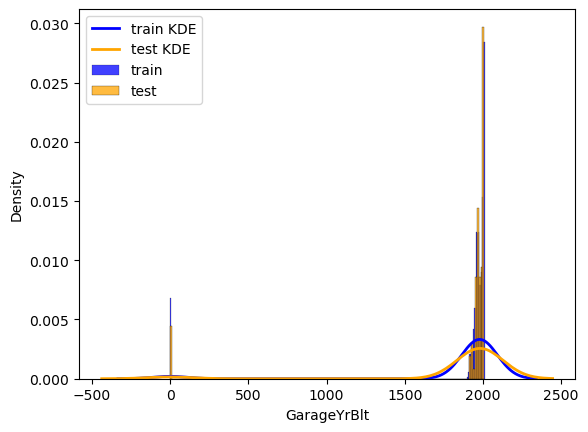

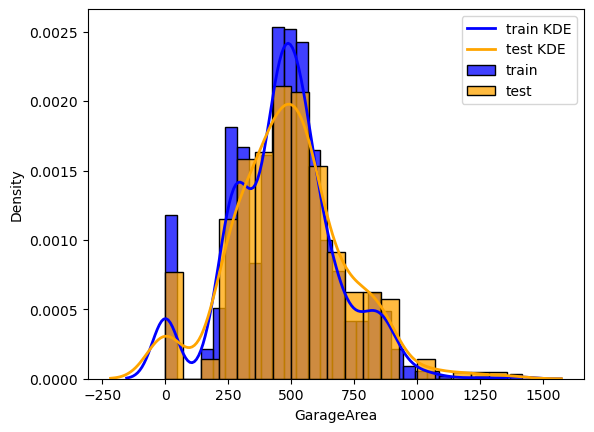

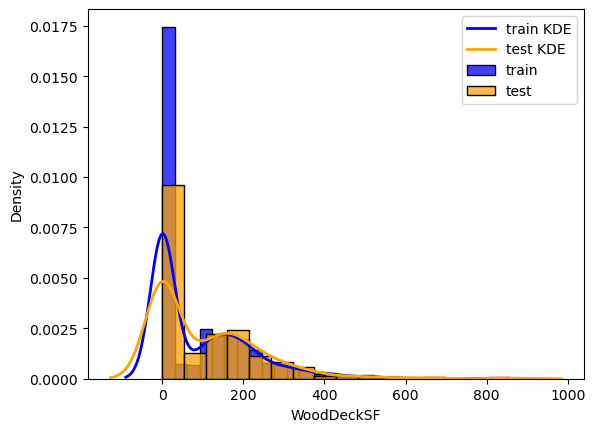

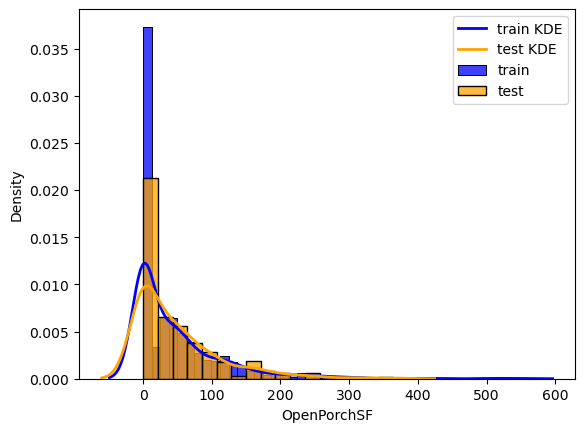

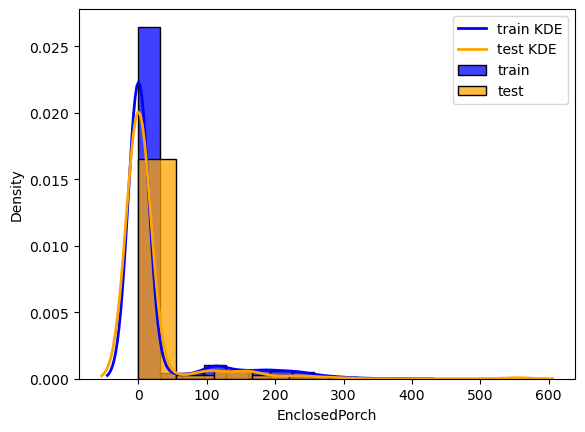

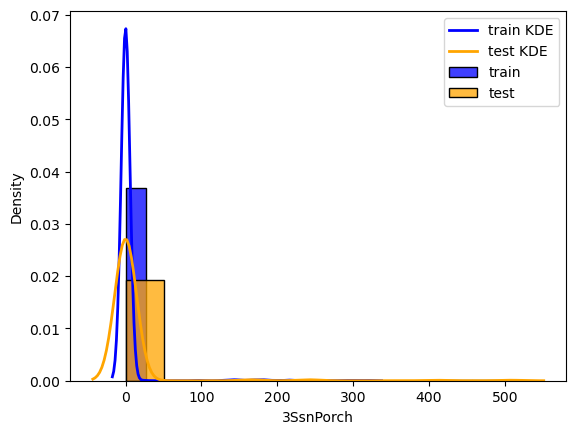

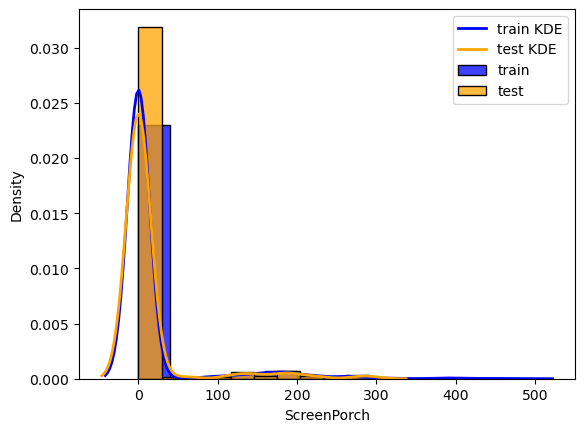

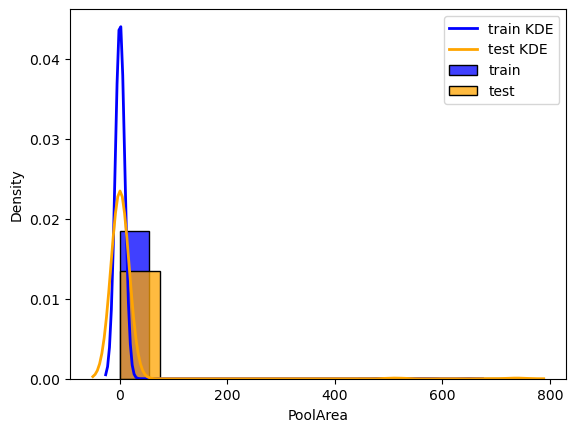

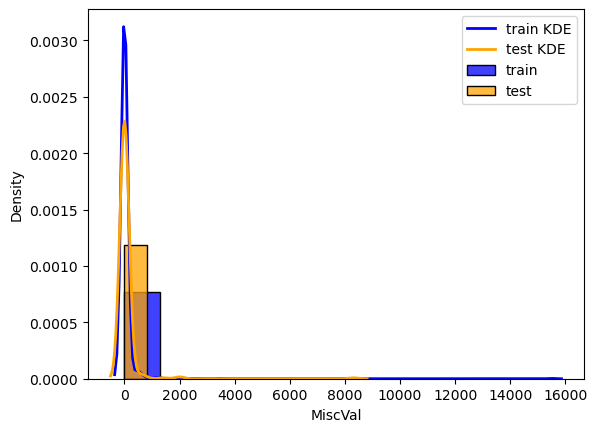

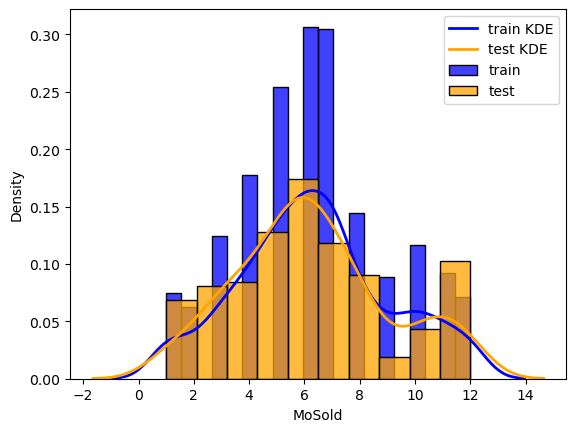

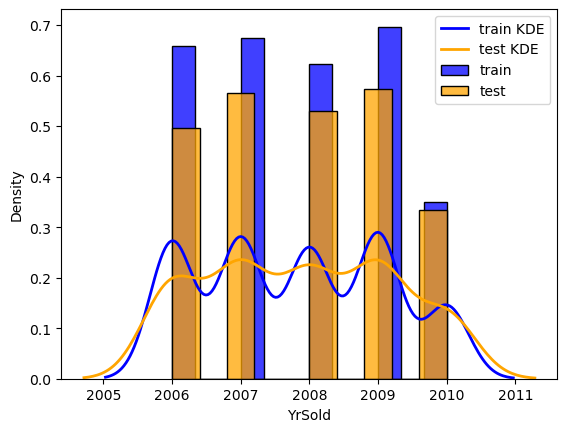

In [28]:
for col in df.columns:
    if col == 'SalePrice':
        None 
    else:
        plt.figure()
        sns.histplot(df[col], label='train', color='blue', kde=False, stat='density')
        sns.histplot(X_test[col], label='test', color='orange', kde=False, stat='density')
        sns.kdeplot(df[col], color='blue', label='train KDE', linewidth=2)
        sns.kdeplot(X_test[col], color='orange', label='test KDE', linewidth=2)
        plt.legend()
        plt.show()

**Insight:**
- The 1d density is similar from train to test.

In [30]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport
# Generate the Pandas Profiling Report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Save the report to an HTML file (optional)
profile.to_file("ex0_data_report.html")

# profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]